# The notebook used to generate figures for the paper

In [9]:
import seaborn as sns
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from clustergram import Clustergram
import urbangrammar_graphics as ugg

sns.set(style='whitegrid')

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
data = scale(penguins.drop(columns=['species', 'island', 'sex']).dropna())

In [11]:
cgram = Clustergram(range(1, 20), n_init=100, verbose=False)
cgram.fit(data)

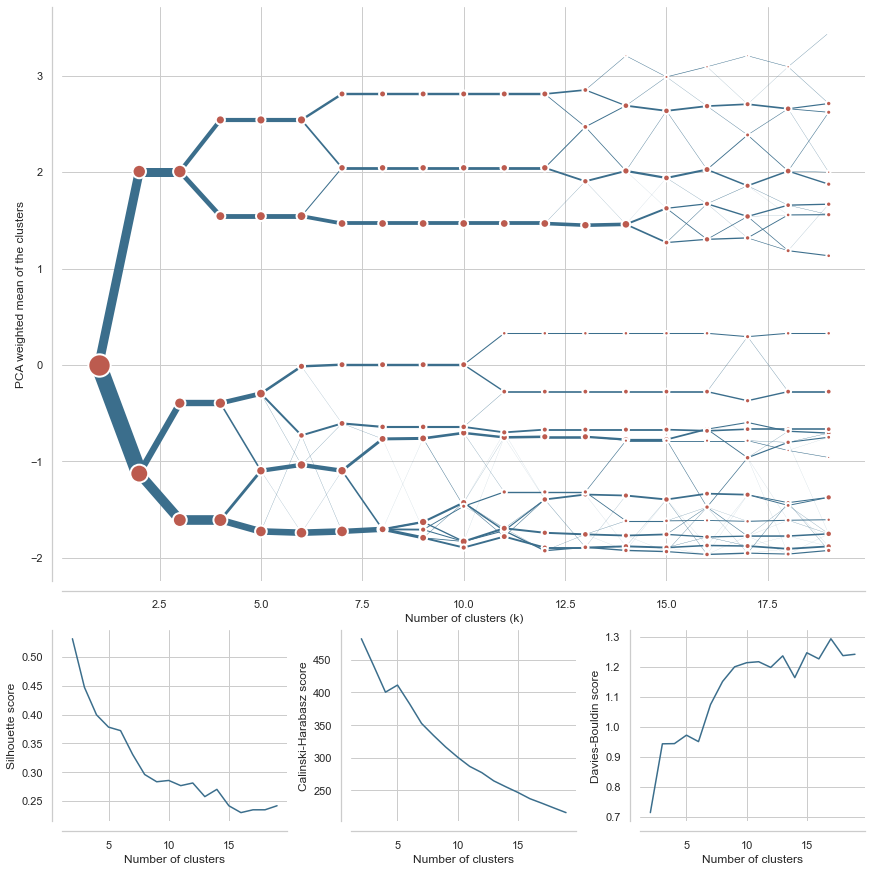

In [15]:
mosaic = """
    AAA
    AAA
    AAA
    BCD
    """
fig = plt.figure(constrained_layout=True, figsize=(12, 12))
ax_dict = fig.subplot_mosaic(mosaic)

cgram.plot(
    cluster_style={"color": ugg.COLORS[2]},
    line_style={"color": ugg.COLORS[1], },
    linewidth=0.5,
    ax=ax_dict["A"],
)
# ax_dict["A"].set_ylim(-30, 50)
sns.despine(offset=10)
# for ax in ax_dict.values():
#     ax.axvline(x=10, c=ugg.COLORS[4], linestyle="-.")
cgram.silhouette_score().plot(color=ugg.COLORS[1], ax=ax_dict["B"], ylabel="Silhouette score", xlabel="Number of clusters")
cgram.calinski_harabasz_score().plot(color=ugg.COLORS[1], ax=ax_dict["C"], ylabel="Calinski-Harabasz score", xlabel="Number of clusters")
cgram.davies_bouldin_score().plot(color=ugg.COLORS[1], ax=ax_dict["D"], ylabel="Davies-Bouldin score", xlabel="Number of clusters")
plt.savefig("pca.svg", dpi=300)

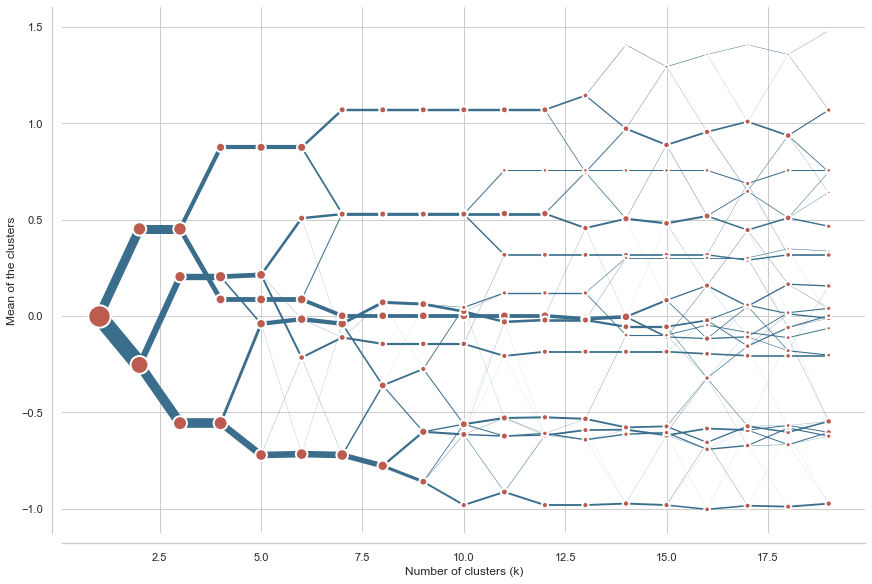

In [17]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 8))
# ax_dict = fig.subplot_mosaic(mosaic)

cgram.plot(
    cluster_style={"color": ugg.COLORS[2]},
    line_style={"color": ugg.COLORS[1], },
    linewidth=0.5,
    ax=ax,
    pca_weighted=False
)
# ax_dict["A"].set_ylim(-30, 50)
sns.despine(offset=10)
# for ax in ax_dict.values():
#     ax.axvline(x=10, c=ugg.COLORS[4], linestyle="-.")
# cgram.silhouette.plot(color=ugg.COLORS[1], ax=ax_dict["B"], ylabel="Silhouette score", xlabel="Number of clusters")
# cgram.calinski_harabasz.plot(color=ugg.COLORS[1], ax=ax_dict["C"], ylabel="Calinski-Harabasz score", xlabel="Number of clusters")
# cgram.davies_bouldin.plot(color=ugg.COLORS[1], ax=ax_dict["D"], ylabel="Davies-Bouldin score", xlabel="Number of clusters")
plt.savefig("mean.svg", dpi=300)